CHATBOT PROJECT SUBMISSION

COURSE: COMPUTATIONAL THINKING SPRING 2022

STUDENT NAME : DOAN LAM PHUONG

### Introducing the Bots 


### SushiOrderBot Functionalities:
Webscrape sushi menu and their prices and produce a dataframe with two columns : sushi type and prices

### StocksInfoBot Functionalities: A quick overview of the Chatbot

1 : The bot takes the keyword and return the desired result (i.e keyword "stop" ends the program, keyword "pause" does NOT end the program)

2 : bot can do an introduction of itself when the session starts

3 : bot prints the start date & time of the session

4 : get stock quotes within the last 60 days /OK (60 but because of weekends, actual trading days during this period are fewer e.g 42 - 45 trading days) using YahooFinance API

5 : Write the resulting stock quotes in a local json file (1 json for each stock). keyword "json" 

    Warning: tickerdata.json data will NOT be overwritten every time a new ticker is entered. 
    if I have more time I will find a solution to rename the new file each time.

6 : Return stock attributes statistics (max, min, median, quantiles,...)

7 : Plot the 60-day stock price

8 : Plot some statistics using seaborn

9 : Add a "Tip of the day" function. Keywords : tip1, tip2, tip3, tip4

10 : Order sushi, display sushi price menu, telephone number obtained from SushiOrderBot / webscraping / working code (keyword : ordersushi)

Probably Relevant Development Note: YahooFinance data is available since 1950.


In [2]:
# Import all necessary libraries except for datetime delta which will be imported later

import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
import json
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns # statistical visualization
#import scrapy
from bs4 import BeautifulSoup  # for HTML & XML
import requests
import time

In [3]:
# try opening the json files
# tip.json file
data_path = "./data/tip.json"
# commands json file
commands_data_path = "./data/basic_commands.json"

In [4]:
# Open the json file from local 
with open(data_path) as json_file:
    tip_data = json.load(json_file)

In [5]:
with open(commands_data_path) as json_file_commands:
    basic_commands_data = json.load(json_file_commands)

In [6]:
tip_data

{'tip1': 'Day trading is not a profitable career',
 'tip2': 'Most people do not make a living on day trading',
 'tip3': 'ESG companies are not that profitable',
 'tip4': 'Sorry, this information is confidential'}

In [7]:
basic_commands_data

{'pause': ['Pause', 'PAUSE', 'pause'],
 'stop': ['stop', 'STOP', 'Stop', 'quit', 'QUIT', 'Quit', 'q']}

In [8]:
key_list =[]
commands_list =[]

In [9]:
for key, value in tip_data.items():
    key_list.append(key)
for key, value in basic_commands_data.items():
    commands_list.append(key)

In [10]:
key_list

['tip1', 'tip2', 'tip3', 'tip4']

In [11]:
commands_list

['pause', 'stop']

In [12]:
# Add and subtract days using timedelta
from datetime import date, timedelta

In [13]:
# Get the today date in day-month-year, hour-minute-second format
# Note: Run this cell before running the next cell i.e creating the chatbot
TODAY=datetime.now().strftime("%d-%m-%Y, %H:%M:%S")

In [14]:
# Define a function to do webscrapping
# Goal : get sashimi and their prices
url = "http://www.yamatosushibar.ch/?page_id=8"
col_names = ["Sashimi Type", "Price"]
def web_scrape_sushi(url):
    time.sleep(3) # sleep for 3 seconds so as not to send simultaneous requests to website
    r = requests.get(url)
    print("URL", url, "retrieved with status code", r.status_code)
    html = BeautifulSoup(r.text,"html.parser")
    return html

# Define a function to clean up the scrapped data
def clean(html):
    # get prices
    price = html.find_all('td', valign='bottom', width="65")
    price_content = []
    for i in range(len(price)):
        price_content.append(price[i].contents)

    # replace non-breaking spaces \xa0 with regular space " "
    clean_content = []
    for i in range(len(price_content)):
        new_element = price_content[i][0].replace(u"\xa0", u" ")
        clean_content.append(new_element)
    list=[]
    for element in clean_content:
        split_element = element.split()
        split_element = split_element[1].replace(".-", "")
        list.append(split_element)

    #convert string prices to floats
    num_price =[]
    for i, element in enumerate(list):
        num_element = float(list[i])
        num_price.append(num_element)

    # get sashimi names
    sashimi = html.find_all("td", valign="bottom", width= "96")
    sashimi_content =[]
    # get beautifulSoup contents
    for i in range(len(sashimi)):
        sashimi_content.append(sashimi[i].contents)
    sashimi_list =[]
    # replace non-breaking spaces with regular spaces
    for i in range(len(sashimi_content)):
        new_element = sashimi_content[i][0].replace(u"\xa0", u" ")  
        sashimi_list.append(new_element)

    # concatenate sashimi and price to produce a dataframe
    sashimi_list = sashimi_list[0:7]
    sashimi_list = pd.Series(sashimi_list)
    num_price = num_price[0:7]
    num_price = pd.Series(num_price)
    sushi_df = pd.concat([sashimi_list, num_price], axis =1) # horizontally
    sushi_df.columns = col_names
    return sushi_df

In [15]:
# SushiOrderBot
class SushiOrderBot:
    def __init__(bot,url):
        bot.url = url
    def order_sushi(bot):
        bot.html = web_scrape_sushi(bot.url)
        bot.clean = clean(bot.html)
        print("Please see the sashimi menu below (amount in Swiss francs)")
        print(bot.clean)
        print("Call  032 323 90 00 to order your sushi. Bon appétit !")

In [16]:
url = "http://www.yamatosushibar.ch/?page_id=8"

In [17]:
# StocksInfoChatBot
class StocksInfoChatBot: 
    def __init__(bot, user): # method 1
        bot.user = user # Refer to another class 
        bot.name = "your Stock Information Provider Chatbot"
        bot.finished = False
        bot.df = pd.DataFrame()
        bot.ticker = []
        bot.tip = []
        bot.dict = tip_data
        bot.keys = key_list
        bot.today = TODAY
        bot.close = []
        bot.sushi = order
        print("Hello, ", bot.user, "I'm ", bot.name)

    # chat_task method: Getting first user input, the stock ticker (symbol)
    def chat_task(bot):
        while not bot.finished:
            print("Session opened at", bot.today)
            print("Hello,", "I'm", bot.name, ".", " Please enter any stock ticker or keywords to continue:")
            print("Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file")
            command = input("Please enter a stock ticker to continue: ")
            bot.process_command(command)
    # get_stock_ticker method : Getting 
    def get_and_plot_ticker(bot, command):
        # download the data (live) as a dataframe
        # data start date: 60 days earlier than end date, end date: today
        # print the dataframe
        bot.ticker = str(command)
        bot.df = yf.download(bot.ticker, start = date.today() - timedelta(60), end = date.today() , progress=False, auto_adjust=True)
        print(bot.df)
        # print statistics
        print(bot.df.describe())
        # plot CLOSE prices
        # reverse the series so that x-axis date values are displayed chronologically
        sns.set_theme(style = "darkgrid")
        plt.figure(figsize=(15,10))
        bot.df["Close"].iloc[::-1].plot(kind="line", marker= ".", color = "red", ms=5, title = f"60-DAY PRICES FOR {bot.ticker.upper()}")
        # plot histogram (open, close, volume, ...)
        bot.df.hist(figsize= (15,10), bins= 50, edgecolor= "black")
        plt.subplots_adjust(hspace= 0.7, wspace= 0.4, top =0.8)
        plt.show()
    def tip_of_the_day(bot, command):
        bot.tip == command
        if command in bot.keys:
            print(bot.dict[bot.tip])
    def process_command(bot, command):
            if command in basic_commands_data["stop"]:
                bot.finished = True
                print("Here is your plot. Thanks and have a nice day")
            elif command in basic_commands_data["pause"]:
                bot.finished = False
                print("Before the pause, here is your plot")
            elif str(command) in bot.keys:
                print(bot.dict[command])
            # save the ticker data as a json file
            elif str(command) == "json":
                ticker = bot.df
                try:
                    with open("tickerdata.json", "r") as filepath:
                        ticker = json.load(filepath)
                    print("File already created in directory. To proceed, insert another stock ticker")
                except IOError:
                    print("JSON File not found, a new JSON file will be created in the working directory")
                    ticker = ticker.to_json(orient = "split")
                with open("tickerdata.json", "w") as filepath:
                    json.dump(ticker, filepath, indent =4)
            elif str(command) == "ordersushi":
                print(sushi.order_sushi())
            else:
                bot.get_and_plot_ticker(command)

In [18]:
# Create a User Class:

class User:
    def __init__(myself, name):
        myself.name = name

In [19]:
me = User("BotOwner")

In [20]:
sushi = SushiOrderBot(url)

In [21]:
order = sushi.order_sushi()

URL http://www.yamatosushibar.ch/?page_id=8 retrieved with status code 200


TypeError: 'NoneType' object is not callable

In [21]:
# Assign the class to object my_bot
my_bot = StocksInfoChatBot(me)

Hello,  <__main__.User object at 0x000001DC1A5114F0> I'm  your Stock Information Provider Chatbot


Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
                   Open         High         Low        Close    Volume
Date                                                                   
2022-01-24   904.760010   933.510010  851.469971   930.000000  50521900
2022-01-25   914.200012   951.260010  903.210022   918.400024  28865300
2022-01-26   952.429993   987.690002  906.000000   937.409973  34955800
2022-01-27   933.359985   935.390015  829.000000   829.099976  49036500
2022-01-28   831.559998   857.500000  792.010010   846.349976  44929700
2022-01-31   872.710022   937.989990  862.049988   936.719971  34812000
2022-02-01   935.210022   943.700012  905.000000   931.250000  24379400
2022-02-02   928.179993   931.500000  889.409973   905.659973  22

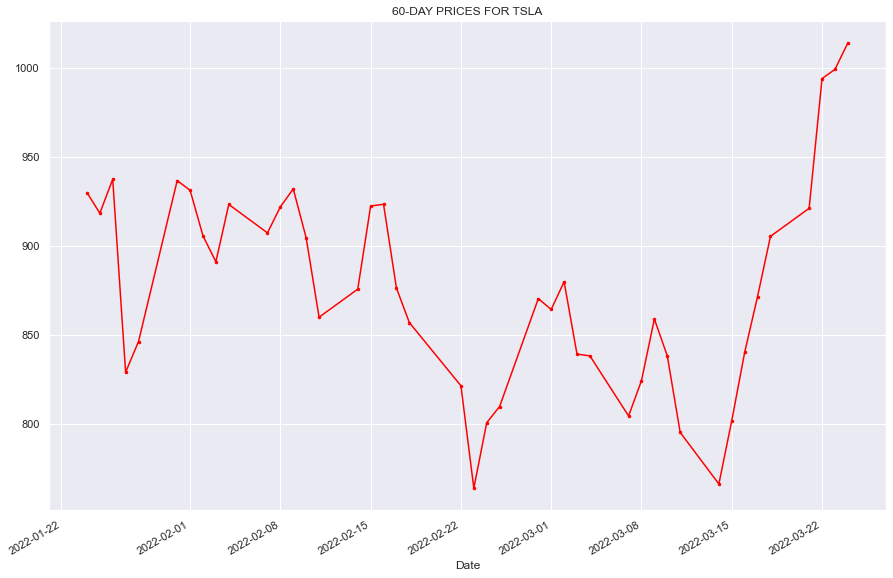

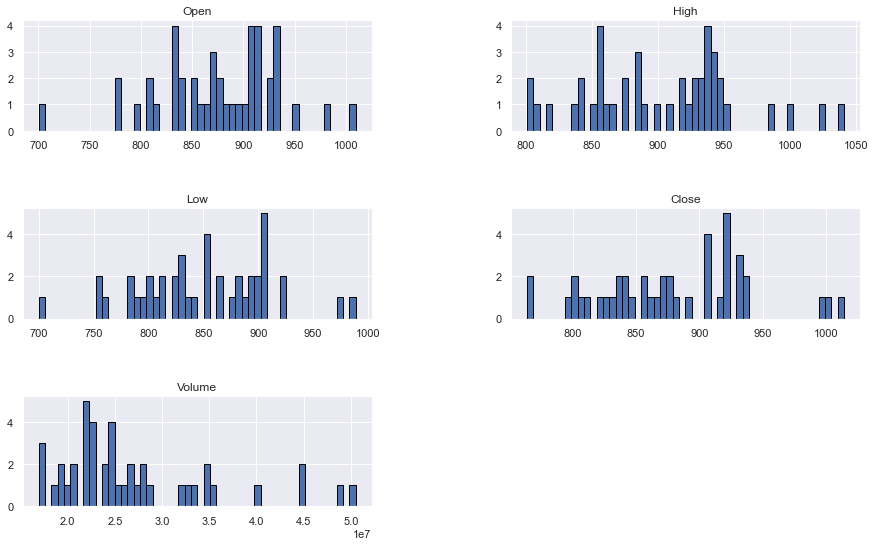

Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
                 Open       High        Low      Close    Volume
Date                                                            
2022-01-24  18.350000  18.500000  18.014999  18.469999  11875800
2022-01-25  18.350000  18.680000  18.145000  18.610001   6053100
2022-01-26  18.980000  19.020000  18.620001  18.799999   6186500
2022-01-27  18.629999  18.780001  18.230000  18.420000   7977200
2022-01-28  18.129999  18.440001  18.055000  18.430000   9245700
2022-01-31  18.360001  18.680000  18.315001  18.670000   6229600
2022-02-01  19.770000  20.400000  19.740000  20.400000   9568100
2022-02-02  20.480000  20.629999  20.260000  20.530001   5507700
2022-02-03  20.600000  20.684999  20.340000  20.370001   419300

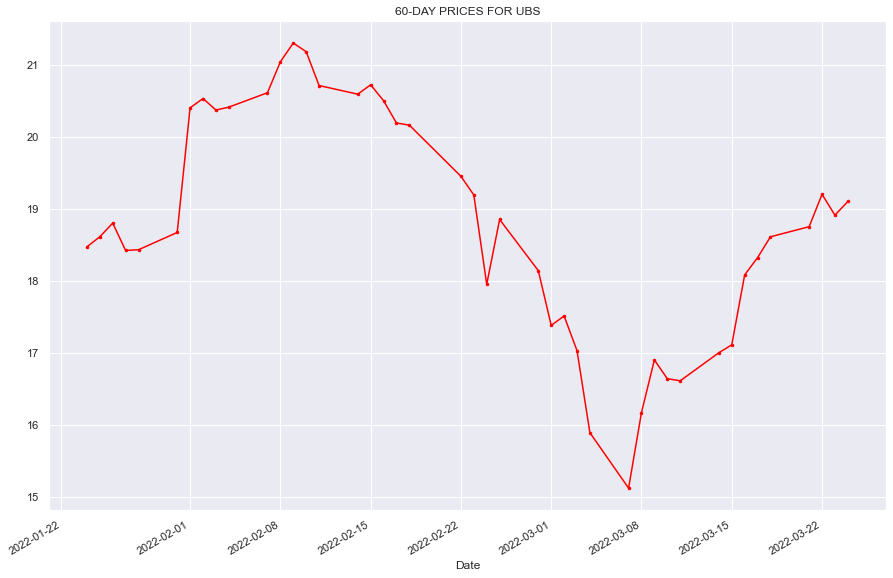

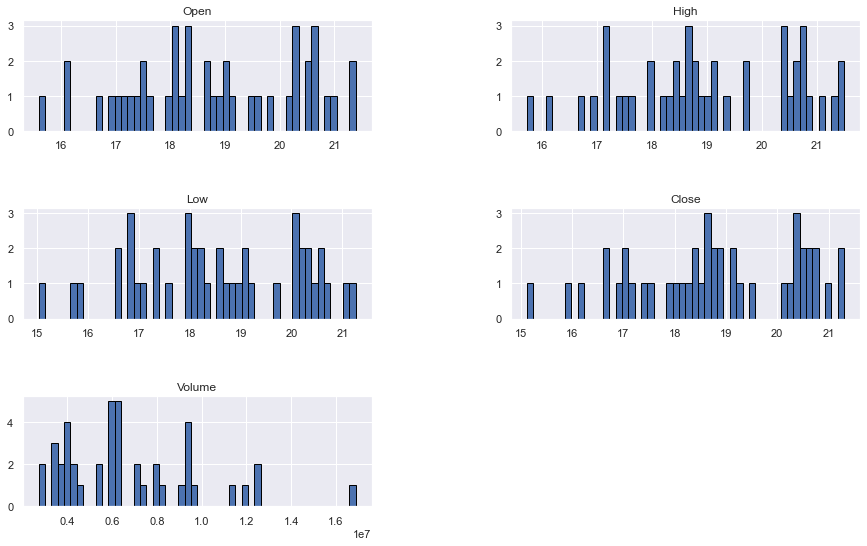

Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
                   Open         High          Low        Close    Volume
Date                                                                    
2022-01-24  2780.000000  2898.899902  2707.040039  2890.879883   7781200
2022-01-25  2844.850098  2872.000000  2762.899902  2799.719971   4541200
2022-01-26  2895.000000  2903.699951  2746.370117  2777.449951   4780100
2022-01-27  2816.000000  2884.870117  2787.000000  2792.750000   3875800
2022-01-28  2817.209961  2879.959961  2758.590088  2879.560059   3719600
2022-01-31  2895.000000  3007.209961  2886.010010  2991.469971   3915400
2022-02-01  3000.000000  3034.159912  2952.550049  3023.870117   2961000
2022-02-02  3101.010010  3101.500000  2977.270020  3012.

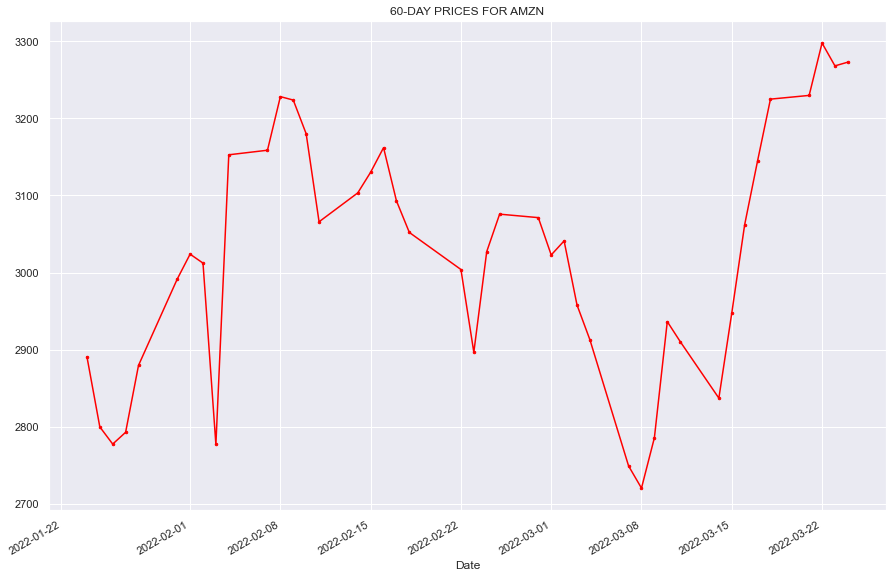

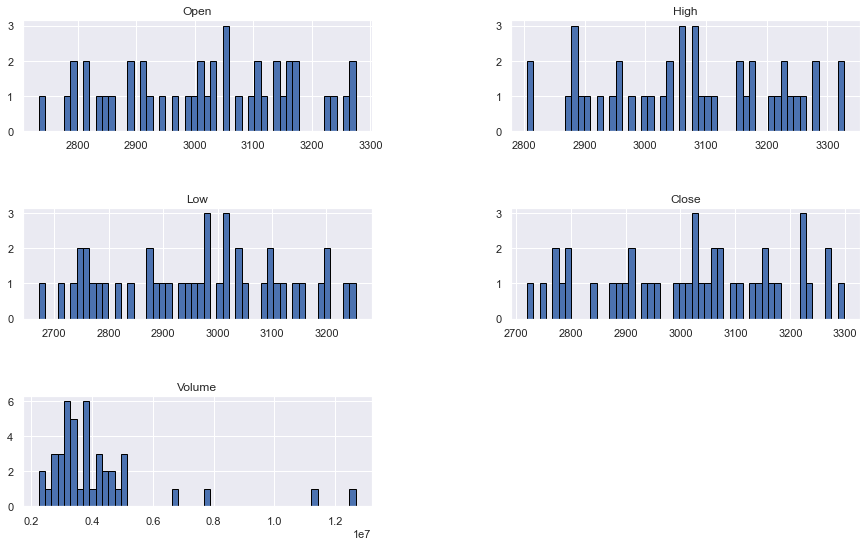

Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
Day trading is not a profitable career
Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
Most people do not make a living on day trading
Session opened at 25-03-2022, 18:58:32
Hello, I'm your Stock Information Provider Chatbot .  Please enter any stock ticker or keywords to continue:
Available keywords (excl. stock tickers) : tip1, tip2, tip3, tip4 to display the Tip of the day, json : save retrieved data as a json file
Most people do not make a living on day trading
Sess

In [22]:
my_bot.chat_task()